# **Hotel Business Data Visualization**

## 1. Import Library

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import scipy.stats as scp
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Import Dataset

In [2]:
df = pd.read_csv('hotel_bookings_data.csv', error_bad_lines=False, warn_bad_lines=True)
pd.set_option('display.max_columns', None)
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
119385,City Hotel,0,23,2019,October,35,30,2,5,2,0.0,0,Breakfast,Kabupaten Magelang,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,394.0,NaN,0,Personal,96.14,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,0.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,225.43,0,2,Check-Out
119387,City Hotel,0,34,2019,October,35,31,2,5,2,0.0,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,157.71,0,4,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,89.0,NaN,0,Personal,104.40,0,0,Check-Out
119389,City Hotel,0,205,2019,October,35,29,2,7,2,0.0,0,Dinner,Kabupaten Bandung,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,151.20,0,2,Check-Out


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 3. Data Preprocessing

### 3.1 Handling Missing Value

In [5]:
# Check for missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [6]:
# Percentage of missing values
def check_null(df) :
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = round((col_na/len(df))*100,3)
    missing_data = pd.concat([col_na, percent],axis=1, keys=['Total Missing Values','Percentage(%)'])
    print(missing_data[missing_data['Total Missing Values'] > 0])
    
check_null(df) 

          Total Missing Values  Percentage(%)
company                 112593         94.307
agent                    16340         13.686
city                       488          0.409
children                     4          0.003


In [7]:
# fill in the columns that have missing values
df = df.fillna({
    'children' : 0.0,
    'city' : 'unknown',
    'agent' : 0,
    'company' : 0
})

In [8]:
# Check for missing values again
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### 3.2 Handling inappropriate values

In [9]:
# checking unique values in columns of object data type
for column in df.columns:
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f'Unique values in {column}: {unique_values}')

Unique values in hotel: ['Resort Hotel' 'City Hotel']
Unique values in arrival_date_month: ['September' 'October' 'November' 'December' 'January' 'February' 'March'
 'April' 'May' 'June' 'July' 'August']
Unique values in meal: ['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']
Unique values in city: ['Kota Denpasar' 'Kabupaten Bangka' 'Kabupaten Sleman' 'Kota Batu'
 'Kota Malang' 'Kota Yogyakarta' 'unknown' 'Kabupaten Tangerang'
 'Kota Semarang' 'Kota Serang' 'Kota Tangerang' 'Kota Bogor'
 'Kabupaten Bandung' 'Kabupaten Magelang' 'Kabupaten Sumedang'
 'Kota Jakarta Timur' 'Kabupaten Purwakarta' 'Kabupaten Kepulauan Seribu'
 'Kabupaten Belitung' 'Kota Jakarta Pusat' 'Kota Jakarta Selatan'
 'Kota Surabaya' 'Kota Jakarta Utara' 'Kota Gorontalo' 'Kota Jambi'
 'Kota Jakarta Barat' 'Kota Bengkulu' 'Kabupaten Bandung Barat'
 'Kabupaten Bekasi' 'Kabupaten Bogor' 'Kabupaten Ciamis'
 'Kabupaten Cianjur' 'Kabupaten Cirebon' 'Kota Cimahi'
 'Kabupaten Indramayu' 'Kabupaten Karawang' 'Kabupat

In [10]:
# Check the unique value of the meal column
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [11]:
# Changing the value in the meal column
df['meal'].replace('Undefined','No Meal', inplace = True)

In [12]:
# Check the unique value of the meal column
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

In [13]:
# See the number of unique values ​​in the meal column
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

### 3.3 Handling Unnecessary Data

In [14]:
# Create a new feature, namely total_guests
df['total_guest'] = df['adults'] + df['children'] + df['babies']
df[['adults','children','babies','total_guest']].sample(5)

,adults,children,babies,total_guest
105162,1,0.0,0,1.0
82893,2,0.0,0,2.0
94624,2,0.0,0,2.0
13944,1,0.0,0,1.0
65695,2,0.0,0,2.0


In [15]:
df[df['total_guest'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
2224,Resort Hotel,0,1,2017,December,41,6,0,3,0,0.0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,1,No Deposit,0.0,174.0,0,Family,0.00,0,0,Check-Out,0.0
2409,Resort Hotel,0,0,2017,December,42,12,0,0,0,0.0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,0,No Deposit,0.0,174.0,0,Personal,0.00,0,0,Check-Out,0.0
3181,Resort Hotel,0,36,2017,January,47,20,1,2,0,0.0,0,No Meal,Kota Batu,Groups,TA/TO,0,0,0,0,No Deposit,38.0,0.0,0,Family,0.00,0,0,Check-Out,0.0
3684,Resort Hotel,0,165,2017,February,53,30,1,4,0,0.0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308.0,0.0,122,Family,0.00,0,0,Check-Out,0.0
3708,Resort Hotel,0,165,2017,February,53,30,2,4,0,0.0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308.0,0.0,122,Family,0.00,0,0,Check-Out,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2019,August,26,27,0,3,0,0.0,0,Breakfast,Kabupaten Sumedang,Online TA,TA/TO,0,0,0,1,No Deposit,7.0,0.0,0,Personal,100.80,0,0,Check-Out,0.0
115091,City Hotel,0,1,2019,August,26,30,0,1,0,0.0,0,No Meal,Kota Denpasar,Complementary,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,0.00,1,1,Check-Out,0.0
116251,City Hotel,0,44,2019,September,28,15,1,1,0,0.0,0,No Meal,Kota Surabaya,Online TA,TA/TO,0,0,0,2,No Deposit,425.0,0.0,0,Personal,73.80,0,0,Check-Out,0.0
116534,City Hotel,0,2,2019,September,28,15,2,5,0,0.0,0,No Meal,Kota Jakarta Selatan,Online TA,TA/TO,0,0,0,1,No Deposit,9.0,0.0,0,Family,22.86,0,1,Check-Out,0.0


There are 180 hotel bookings that have total_guest = 0. This data can be deleted because it doesn't need to be analyzed

In [16]:
# Deletes data that has total_guests = 0
df= df[df['total_guest'] > 0]
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0


This is data that has been preprocessed. This data is ready to be used for visualization

## 4.  Exploratory Data Analysis

### 4.1 Monthly Hotel Booking Analysis Based on Hotel Type

In [17]:
df1 = df.copy()
df1.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0


In [18]:
# Group data by hotel type and arrival_date_month
df1= df1.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
df1

,hotel,arrival_date_month,nunique,count
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3730
8,City Hotel,May,2,6434
9,City Hotel,November,2,7392


In [19]:
# Rename column
df1.columns = ['hotel_type','arrival_month','total_unique_year','total_bookings']
df1

,hotel_type,arrival_month,total_unique_year,total_bookings
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3730
8,City Hotel,May,2,6434
9,City Hotel,November,2,7392


In [20]:
# Give numbers to the names of the months
mapping_month = {'January' : 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May' : 5, 'June' : 6, 'July' : 7, 'August' : 8, 
                 'September' : 9, 'October' : 10, 'November' : 11, 'December' : 12}

df1['num_of_month'] = df1['arrival_month'].map(mapping_month)
df1

,hotel_type,arrival_month,total_unique_year,total_bookings,num_of_month
0,City Hotel,April,2,4950,4
1,City Hotel,August,2,7885,8
2,City Hotel,December,2,7594,12
3,City Hotel,February,2,4114,2
4,City Hotel,January,2,4336,1
5,City Hotel,July,2,8221,7
6,City Hotel,June,2,7469,6
7,City Hotel,March,2,3730,3
8,City Hotel,May,2,6434,5
9,City Hotel,November,2,7392,11


In [21]:
# Sort months
df1 = df1.sort_values('num_of_month').reset_index(drop=True)
df1

,hotel_type,arrival_month,total_unique_year,total_bookings,num_of_month
0,City Hotel,January,2,4336,1
1,Resort Hotel,January,2,2435,1
2,City Hotel,February,2,4114,2
3,Resort Hotel,February,2,2645,2
4,City Hotel,March,2,3730,3
5,Resort Hotel,March,2,2191,3
6,City Hotel,April,2,4950,4
7,Resort Hotel,April,2,3102,4
8,Resort Hotel,May,2,3334,5
9,City Hotel,May,2,6434,5


In the aggregate table that is formed, it can be seen that October and September have 3 unique values, meaning that in those months, there are three different years, namely 2017, 2018, and 2019. Meanwhile, the other months only have two unique values. If a comparison is made for each month, the total_booking data in October and September needs to be normalized first so that it is equal for comparison with other months. Normalization is done by dividing total_bookings by the number of unique years.

In [22]:
# Create columns avg_total_bookings
df1['avg_total_bookings'] = round(df1['total_bookings']/df1['total_unique_year'],2)
df1

,hotel_type,arrival_month,total_unique_year,total_bookings,num_of_month,avg_total_bookings
0,City Hotel,January,2,4336,1,2168.00
1,Resort Hotel,January,2,2435,1,1217.50
2,City Hotel,February,2,4114,2,2057.00
3,Resort Hotel,February,2,2645,2,1322.50
4,City Hotel,March,2,3730,3,1865.00
5,Resort Hotel,March,2,2191,3,1095.50
6,City Hotel,April,2,4950,4,2475.00
7,Resort Hotel,April,2,3102,4,1551.00
8,Resort Hotel,May,2,3334,5,1667.00
9,City Hotel,May,2,6434,5,3217.00


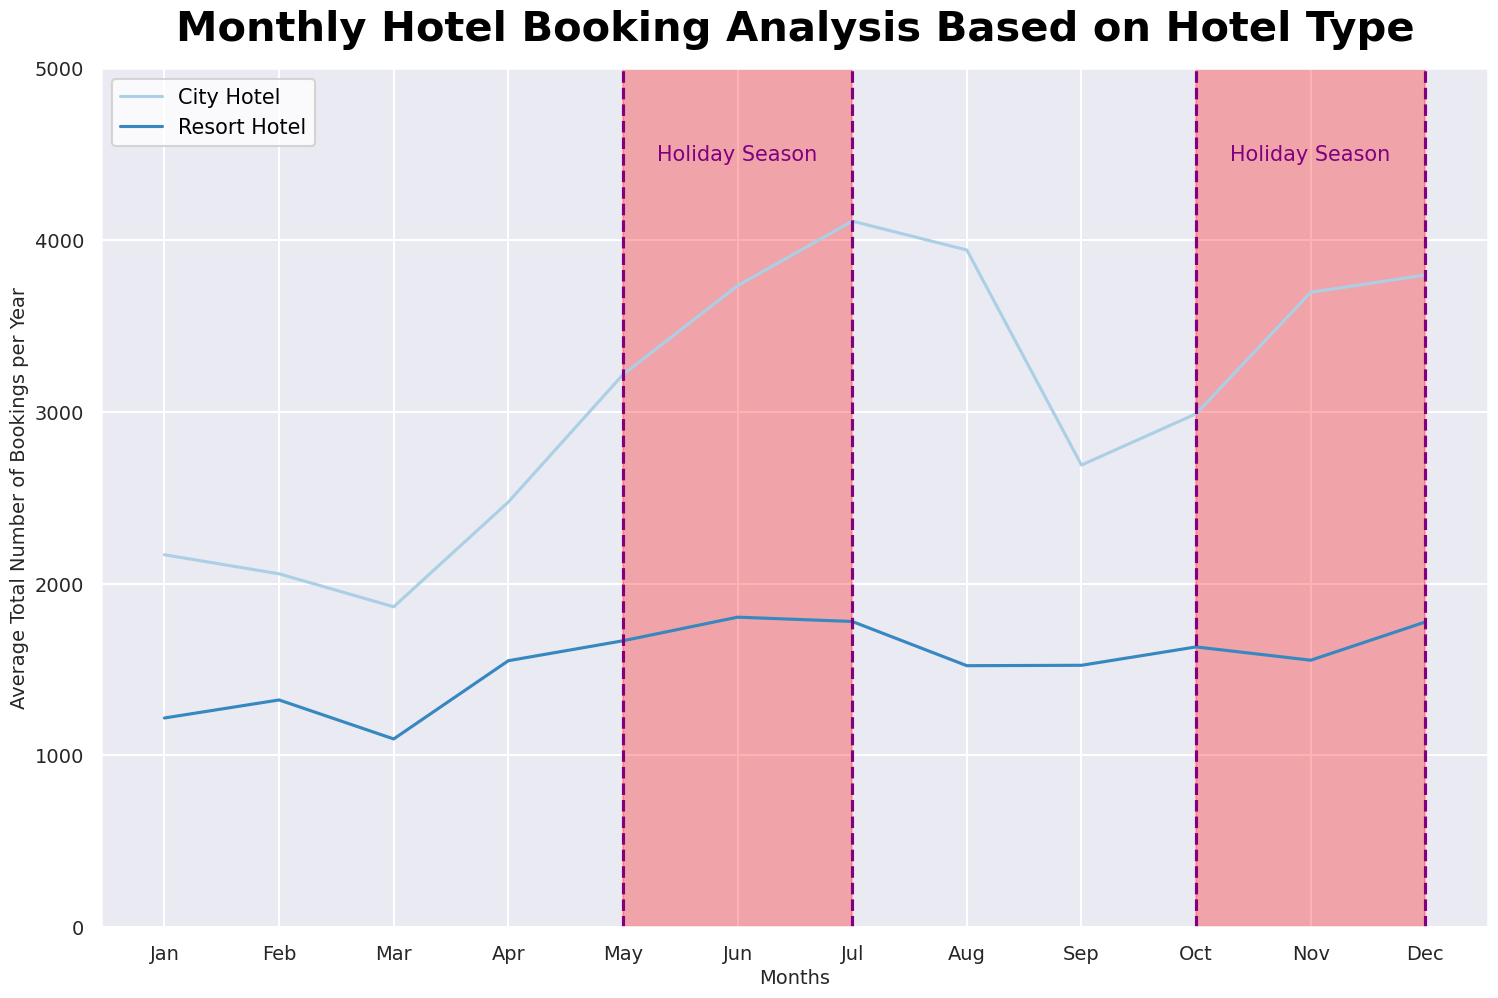

In [23]:
# Create Monthly Hotel Booking Analysis Based on Hotel Type Plot
# Line Plot
sns.set_context("talk", font_scale=0.4)
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(15,10))
    plt.title("Monthly Hotel Booking Analysis Based on Hotel Type", fontsize=30, color='black', 
              weight='bold', pad=20)
    sns.lineplot(data=df1, x='arrival_month', y='avg_total_bookings', hue='hotel_type', 
                 palette='Blues')
    
# Set label in x and y axis
plt.xlabel('Months', fontsize=14)
plt.xticks(np.arange(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Average Total Number of Bookings per Year', fontsize=14)
plt.ylim(0, 5000)
plt.legend(loc='best', fontsize=15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

# Set First holiday season
plt.axvline(4,ls='--', color='purple')
plt.axvline(6, ls='--', color='purple')
plt.stackplot([4, 6], [[5000]], color='red', alpha=0.3)
plt.text(x=4.30, y=4500, s='Holiday Season', fontsize=15, color='purple', va='center')

# # Set Second holiday season
plt.axvline(9, ls='--', color='purple')
plt.axvline(11, ls='--', color='purple')
plt.stackplot([9, 11], [[5000]], color='red', alpha=0.3)
plt.text(x=9.30, y=4500, s='Holiday Season', fontsize=15, color='purple', va='center')

plt.tight_layout()

#### Interpretation:

Based on the visualization above, it can be interpreted as follows:
* The difference in average total bookings between Resort Hotels and City Hotels indicates that City Hotels may have a higher attractiveness or booking policy than Resort Hotels. It could result from City Hotel's more strategic location, complete facilities, or a more attractive pricing policy for customers. To improve the performance of Resort Hotels, it is necessary to consider strategies to attract more customers or improve marketing efficiency to equal City Hotels' total bookings.

* The increase in the number of bookings in June and July at both types of hotels, City Hotels, and Resort Hotels, appears to be correlated with the Hari Raya holiday season and school holidays. Many people take advantage of this vacation to travel and stay at hotels. As a result, these hotels may need to anticipate surges in demand during this period by preparing more facilities and staff to serve customers well. It could also be an opportunity to increase special marketing during this holiday season to attract more guests and increase hotel revenue.

* There was a significant decline in bookings in August and September at City Hotels, which may be because these months are not peak season. Therefore, to reduce susceptibility to seasonal fluctuations, City Hotels may need to develop stronger marketing strategies to attract guests outside the holiday season. It could include special offers or promo packages to entice tourists during the low months.


### 4.2 Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [24]:
df2 = df.copy()
df2.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0


In [25]:
# Create columns stay_duration
df2['stay_duration'] = df2['stays_in_weekend_nights'] + df2['stays_in_weekdays_nights']
df2[['stays_in_weekend_nights','stays_in_weekdays_nights','stay_duration']].head(5)

,stays_in_weekend_nights,stays_in_weekdays_nights,stay_duration
0,0,0,0
1,0,0,0
2,0,1,1
3,0,1,1
4,0,2,2


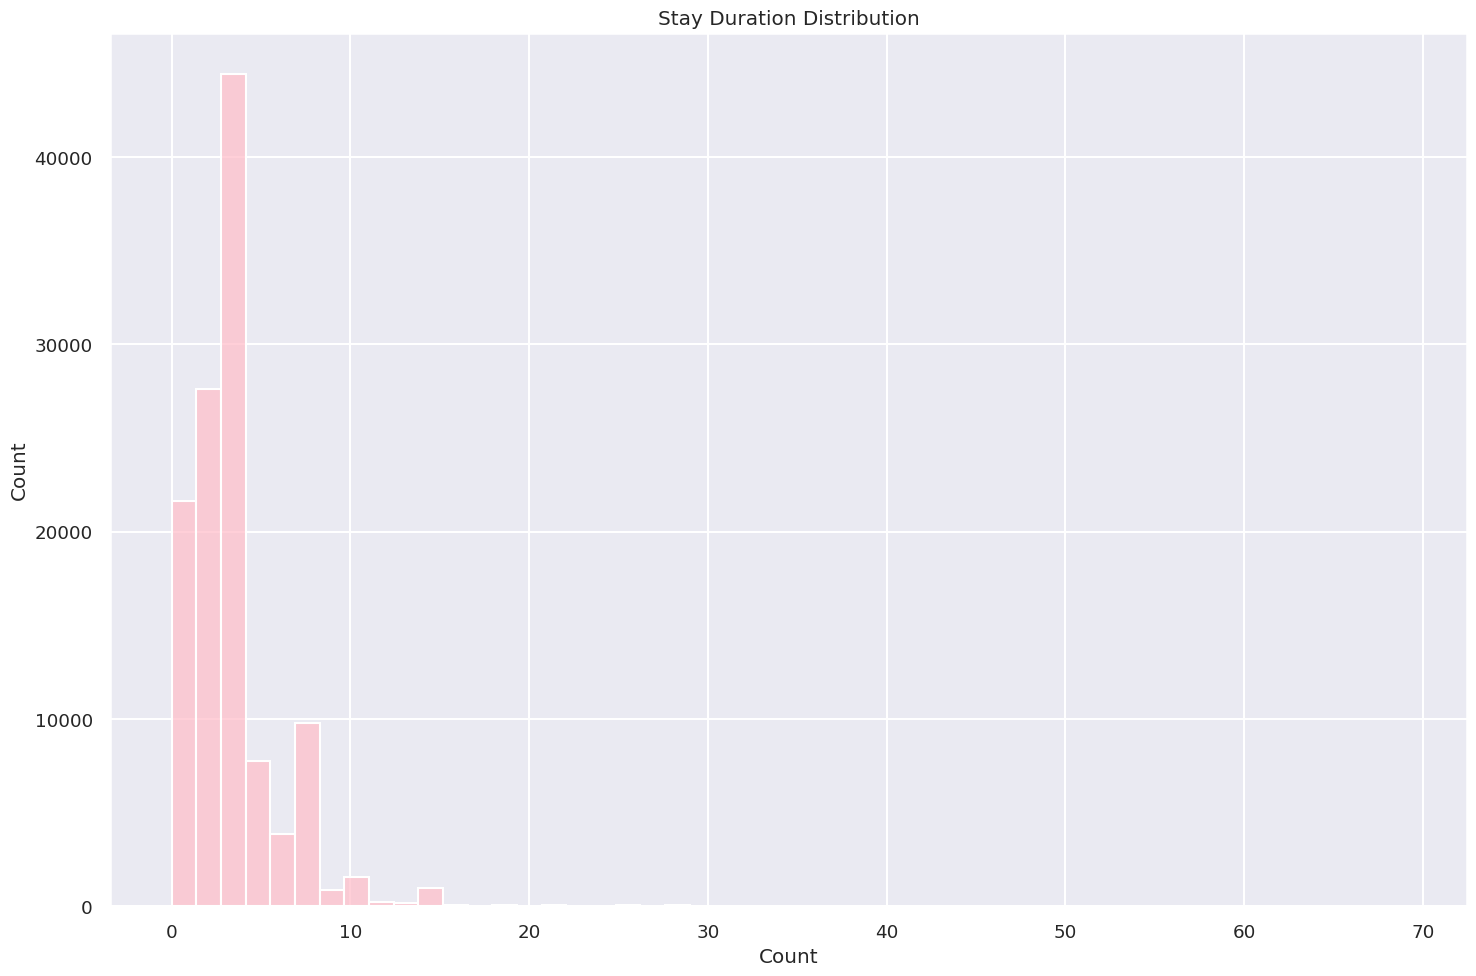

In [26]:
# Create a distribution plot for the stay_duration column
sns.set_context("talk", font_scale=0.8)
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(15,10))
    sns.histplot(data = df2, x = 'stay_duration', color = 'pink', bins= 50)
    ax.set_title('Stay Duration Distribution')
    plt.xlabel('Count')

plt.tight_layout()

In [27]:
# Create a column duration_group column that contains the stay_duration grouping
df2['duration_group'] = np.where(df2['stay_duration'] > 21, 21, 
                                 np.where(df2['stay_duration'] > 14, 15, 
                                 np.where(df2['stay_duration'] > 7, 8, df2['stay_duration'])))
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,stay_duration,duration_group
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.00,0,0,Check-Out,2.0,0,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.00,0,0,Check-Out,2.0,0,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.00,0,0,Check-Out,1.0,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.00,0,0,Check-Out,1.0,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.00,0,1,Check-Out,2.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,0.0,0,Breakfast,Kabupaten Magelang,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,394.0,0.0,0,Personal,96.14,0,0,Check-Out,2.0,7,7
119386,City Hotel,0,102,2019,October,35,31,2,5,3,0.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,225.43,0,2,Check-Out,3.0,7,7
119387,City Hotel,0,34,2019,October,35,31,2,5,2,0.0,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,157.71,0,4,Check-Out,2.0,7,7
119388,City Hotel,0,109,2019,October,35,31,2,5,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,89.0,0.0,0,Personal,104.40,0,0,Check-Out,2.0,7,7


In [28]:
# Group data by hotel, is_canceled and duration_group
df2 = df2.groupby(['hotel', 'is_canceled', 'duration_group'])['arrival_date_month'].count().reset_index(name='num_bookings')
df2

,hotel,is_canceled,duration_group,num_bookings
0,City Hotel,0,0,251
1,City Hotel,0,1,9155
2,City Hotel,0,2,10983
3,City Hotel,0,3,11889
4,City Hotel,0,4,7694
5,City Hotel,0,5,3210
6,City Hotel,0,6,1111
7,City Hotel,0,7,1245
8,City Hotel,0,8,511
9,City Hotel,0,15,29


In [29]:
# Create a pivot table
df2 = df2.pivot_table(index=['hotel', 'duration_group'], columns='is_canceled', values='num_bookings').reset_index()
df2

is_canceled,hotel,duration_group,0,1
0,City Hotel,0,251,13
1,City Hotel,1,9155,4103
2,City Hotel,2,10983,10432
3,City Hotel,3,11889,9482
4,City Hotel,4,7694,4853
5,City Hotel,5,3210,1775
6,City Hotel,6,1111,938
7,City Hotel,7,1245,808
8,City Hotel,8,511,558
9,City Hotel,15,29,76


In [30]:
# Create column cancelation_rates
df2['cancelation_rates'] = round((df2[1]/(df2[0]+df2[1]))*100, 2)
df2

is_canceled,hotel,duration_group,0,1,cancelation_rates
0,City Hotel,0,251,13,4.92
1,City Hotel,1,9155,4103,30.95
2,City Hotel,2,10983,10432,48.71
3,City Hotel,3,11889,9482,44.37
4,City Hotel,4,7694,4853,38.68
5,City Hotel,5,3210,1775,35.61
6,City Hotel,6,1111,938,45.78
7,City Hotel,7,1245,808,39.36
8,City Hotel,8,511,558,52.20
9,City Hotel,15,29,76,72.38


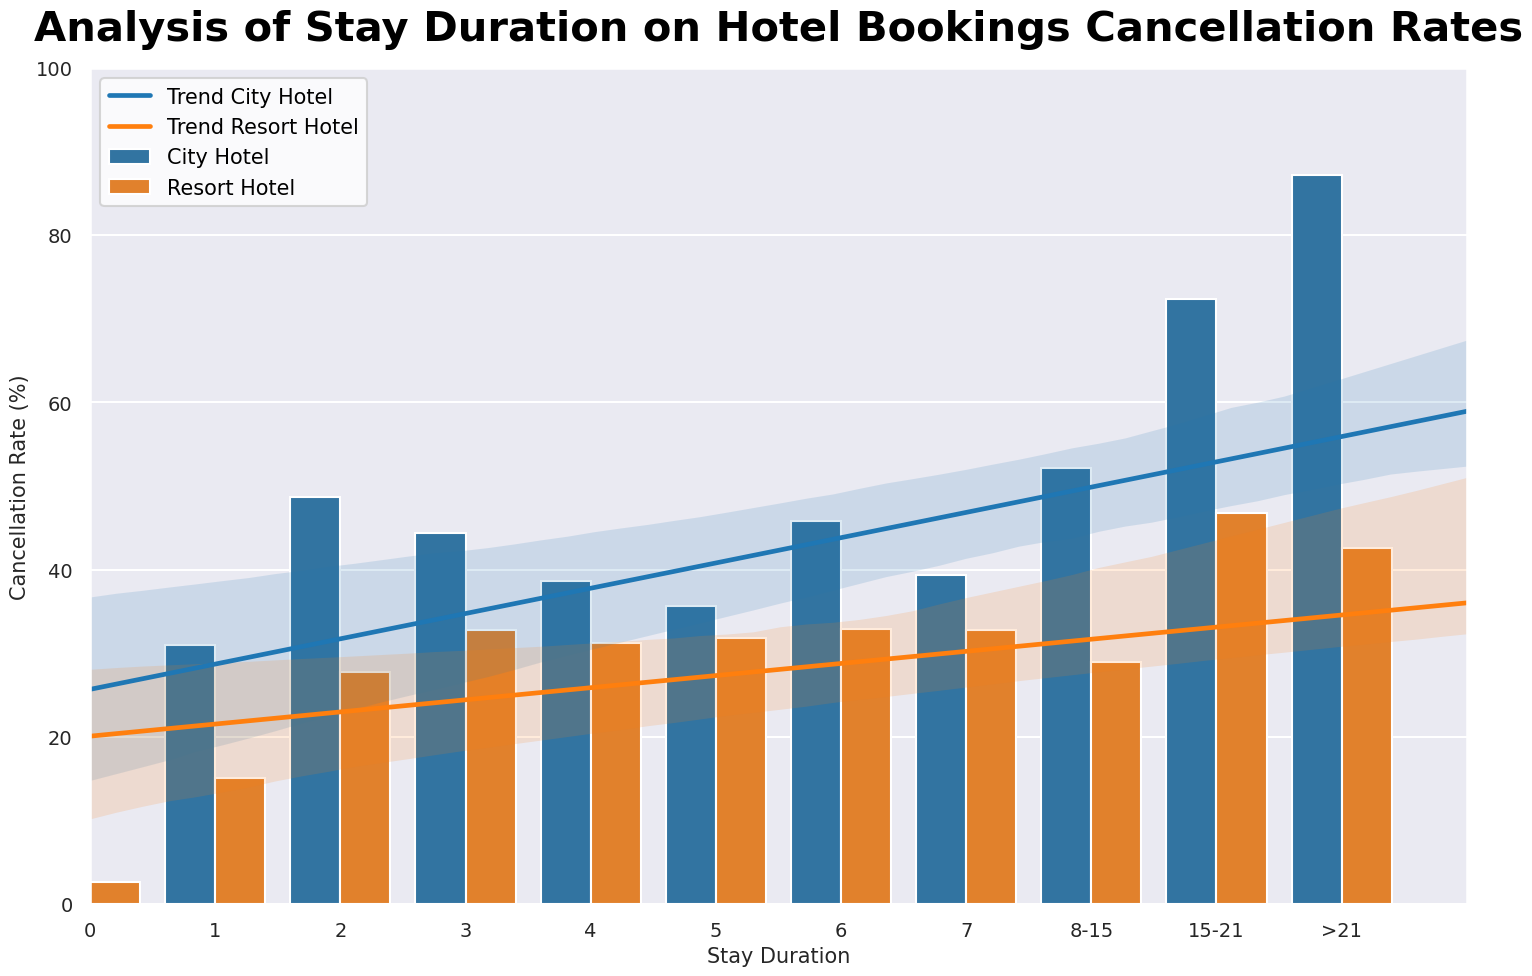

In [31]:
# Analysis of Stay Duration on Hotel Bookings Cancellation Rates Plot
# Bar Plot
sns.set_context("talk", font_scale=0.8)
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(15,10))
    plt.title("Analysis of Stay Duration on Hotel Bookings Cancellation Rates", fontsize=30, 
              color='black', weight='bold', pad=20)
    sns.barplot(x='duration_group', y='cancelation_rates',hue='hotel', data=df2)
    sns.regplot(x='duration_group', y='cancelation_rates',data=df2[df2['hotel'] == 'City Hotel'], 
                scatter=False, label='Trend City Hotel')
    sns.regplot(x='duration_group', y='cancelation_rates',data=df2[df2['hotel'] == 'Resort Hotel'], 
                scatter=False, label='Trend Resort Hotel')

# Set label in x and y axis
plt.ylim(0, 100) 
plt.xlim(0, 11)
plt.xlabel('Stay Duration', fontsize=15) 
plt.ylabel('Cancellation Rate (%)', fontsize=15) 
plt.legend(loc='best', fontsize=15) 
plt.tick_params(axis='both', which='major', labelsize=14) 
plt.xticks(range(0,11,1), labels=[str(x) for x in range(0,8,1)]+["8-15","15-21",">21"]) 

plt.tight_layout() 

#### Interpretation:

Based on the visualization above, it can be interpreted as follows:
* The positive trend in both types of hotels, City Hotels, and Resort Hotels, indicates that the longer a guest stays, the higher the probability of a hotel reservation cancellation rate. It could mean that longer guests may have more uncertain travel plans, making them more likely to cancel their booking. To combat this, hotels may need to take action, such as increasing cancellation policies that are more flexible for guests booking for a more extended period or offering special incentives to encourage guests to keep their bookings.

* The analysis shows that City Hotels experience a steeper positive trend in increasing cancellation rates as the length of stay increases compared to Resort Hotels. To counter this trend, City Hotels may need to review the cancellation policies and special offers provided to guests booking for a long time. It could include providing additional incentives or a friendlier cancellation policy to guests with extended stays. On the other hand, Resort Hotels may need to consider specific strategies to attract guests to stay longer and reduce the possibility of cancellation.


### 4.3 Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [32]:
df3 = df.copy()
df3.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0


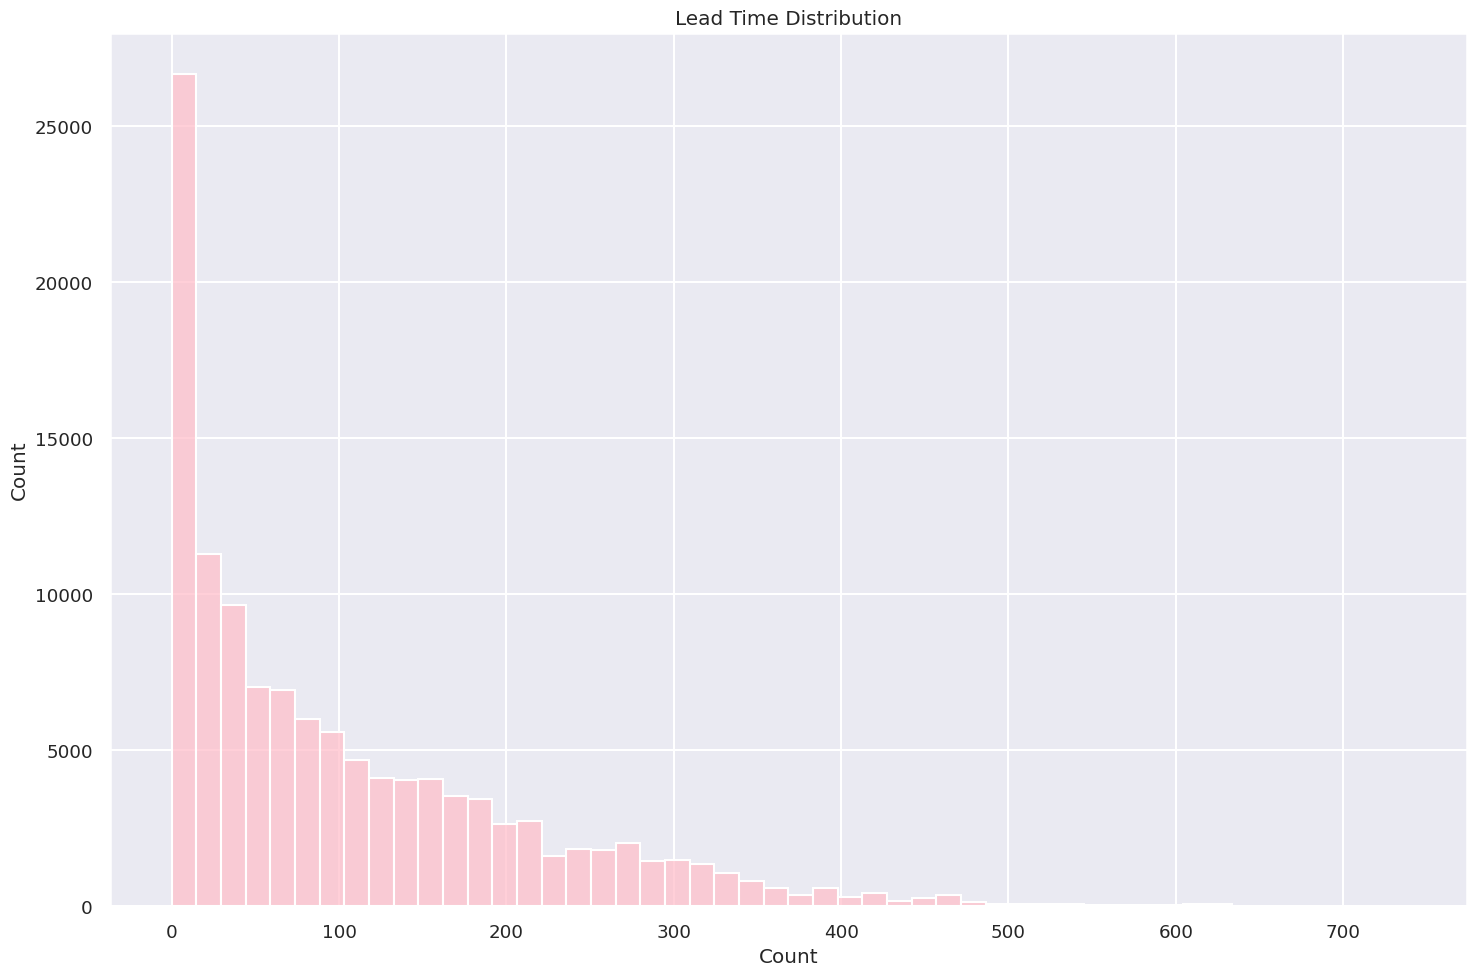

In [33]:
# Create a distribution plot for the lead_time column
sns.set_context("talk", font_scale=0.8)
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(15,10))
    sns.histplot(data = df3, x = 'lead_time', color = 'pink', bins= 50)
    ax.set_title('Lead Time Distribution')
    plt.xlabel('Count')

plt.tight_layout()

In [34]:
# Create a column lead_time_group column that contains the lead_time grouping
df3['lead_time_group'] = np.where(df3['lead_time'] > 390, 391,
                             np.where(df3['lead_time'] > 360, 361,
                             np.where(df3['lead_time'] > 330, 331,
                             np.where(df3['lead_time'] > 300, 301,
                             np.where(df3['lead_time'] > 270, 271,
                             np.where(df3['lead_time'] > 240, 241,
                             np.where(df3['lead_time'] > 210, 211,
                             np.where(df3['lead_time'] > 180, 181,
                             np.where(df3['lead_time'] > 150, 151,
                             np.where(df3['lead_time'] > 120, 121,
                             np.where(df3['lead_time'] > 90, 91,
                             np.where(df3['lead_time'] > 60, 61,
                             np.where(df3['lead_time'] > 30, 31,
                             np.where(df3['lead_time'] <= 30, 1, df3['lead_time']))))))))))))))

df3[['lead_time','lead_time_group']].sample(20)

,lead_time,lead_time_group
23213,0,1
19639,3,1
80344,19,1
97991,47,31
1172,66,61
96475,30,1
20511,1,1
108099,7,1
30509,0,1
117481,121,121


In [35]:
# Group data by hotel, is_canceled and lead_time_group
df3 = df3.groupby(['hotel', 'is_canceled', 'lead_time_group'])['arrival_date_month'].count().reset_index(name='num_bookings')
df3

,hotel,is_canceled,lead_time_group,num_bookings
0,City Hotel,0,1,18060
1,City Hotel,0,31,7266
2,City Hotel,0,61,5210
3,City Hotel,0,91,3956
4,City Hotel,0,121,3064
5,City Hotel,0,151,2442
6,City Hotel,0,181,1800
7,City Hotel,0,211,1224
8,City Hotel,0,241,880
9,City Hotel,0,271,660


In [36]:
# Create a pivot table
df3 = df3.pivot_table(index=['hotel', 'lead_time_group'], columns='is_canceled', values='num_bookings').reset_index()
df3

is_canceled,hotel,lead_time_group,0,1
0,City Hotel,1,18060,5184
1,City Hotel,31,7266,4608
2,City Hotel,61,5210,3692
3,City Hotel,91,3956,3486
4,City Hotel,121,3064,2542
5,City Hotel,151,2442,2716
6,City Hotel,181,1800,1793
7,City Hotel,211,1224,1280
8,City Hotel,241,880,1237
9,City Hotel,271,660,1859


In [37]:
# Create column cancelation_rates
df3['cancelation_rates'] = round((df3[1]/(df3[0]+df3[1]))*100, 2)
df3

is_canceled,hotel,lead_time_group,0,1,cancelation_rates
0,City Hotel,1,18060,5184,22.30
1,City Hotel,31,7266,4608,38.81
2,City Hotel,61,5210,3692,41.47
3,City Hotel,91,3956,3486,46.84
4,City Hotel,121,3064,2542,45.34
5,City Hotel,151,2442,2716,52.66
6,City Hotel,181,1800,1793,49.90
7,City Hotel,211,1224,1280,51.12
8,City Hotel,241,880,1237,58.43
9,City Hotel,271,660,1859,73.80


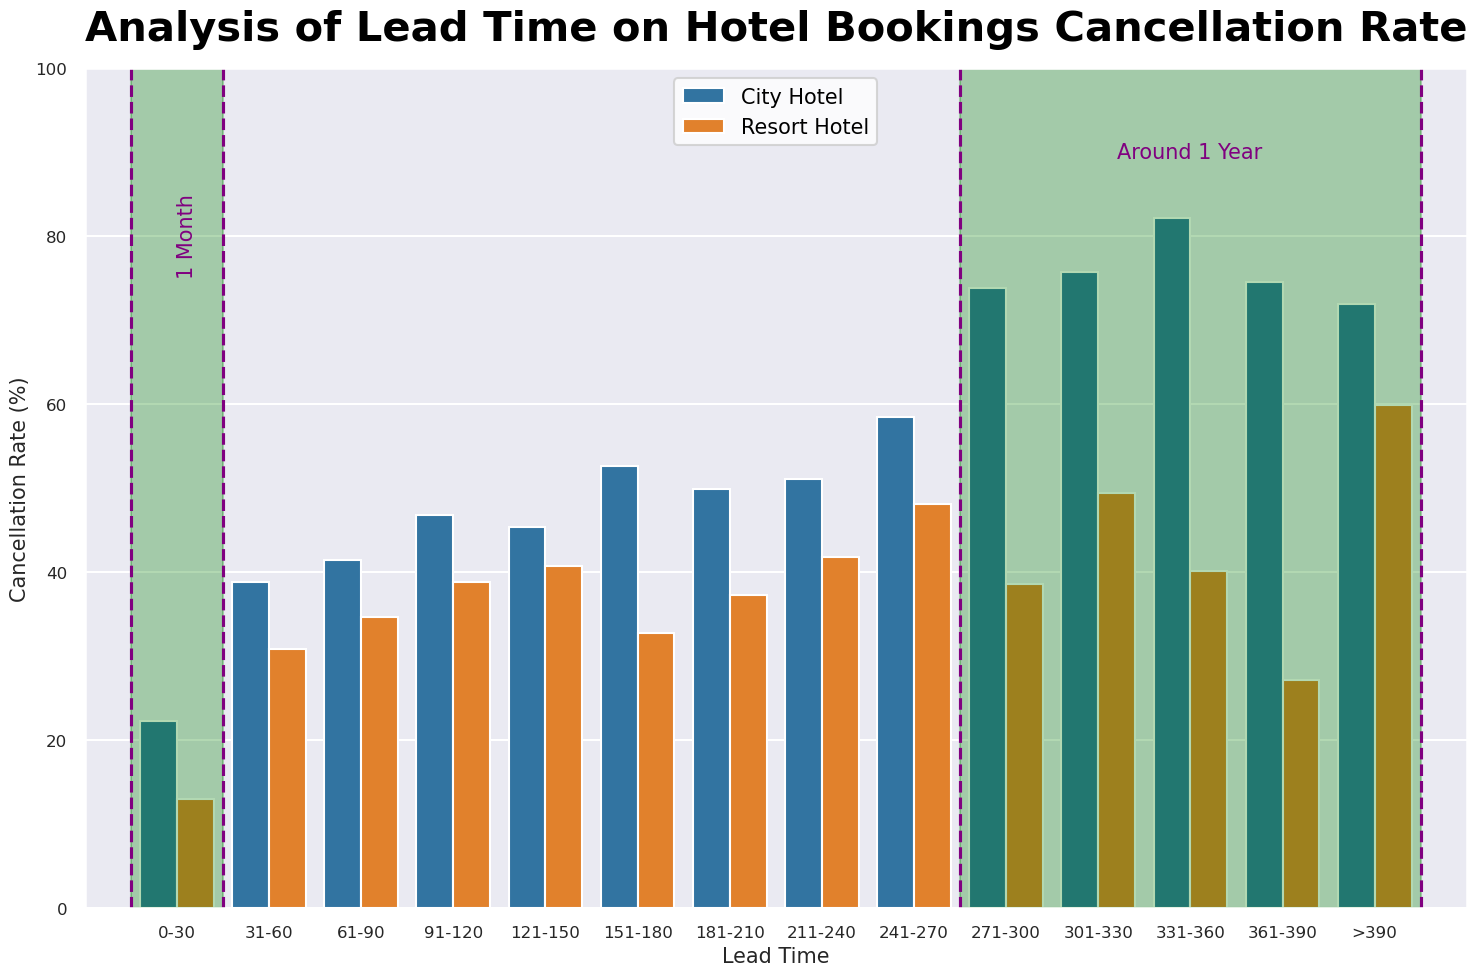

In [42]:
# Create Analysis of Lead Time on Hotel Bookings Cancellation Rate Plot
# Bar Plot
sns.set_context("talk", font_scale=0.8)
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(15,10))
    plt.title("Analysis of Lead Time on Hotel Bookings Cancellation Rate", fontsize=30, 
              color='black', weight='bold', pad=20)
    sns.barplot(x='lead_time_group', y='cancelation_rates',hue='hotel', data=df3, capsize=5)

# Set label in x and y axis
plt.ylim(0, 100) 
plt.xlim(-1, 14)
plt.xlabel('Lead Time', fontsize=15) 
plt.ylabel('Cancellation Rate (%)', fontsize=15) 
plt.legend(loc='best', fontsize=15) 
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.xticks(range(0, 14), ["0-30","31-60","61-90","91-120","121-150","151-180","181-210","211-240","241-270","271-300","301-330","331-360","361-390",">390"])

# Set 1 month
plt.axvline(-0.5,ls='--', color='purple')
plt.axvline(0.5, ls='--', color='purple')
plt.stackplot([-0.5, 0.5], [[100]], color='green', alpha=0.3)
plt.text(x=0, y=80, s='1 Month', fontsize=15, color='purple', va='center', rotation=90)

# Set Around 1 Year
plt.axvline(8.5, ls='--', color='purple')
plt.axvline(13.5, ls='--', color='purple')
plt.stackplot([8.5, 13.5], [[100]], color='green', alpha=0.3)
plt.text(x=10.2, y=90, s='Around 1 Year', fontsize=15, color='purple', va='center')

plt.tight_layout() 

#### Interpretation:

Based on the visualization above, it can be interpreted as follows:
* The lowest order cancellation rate occurs when the waiting time is less than 30 days, which applies to City Hotels and Resort Hotels. It shows that guests who make short-term bookings tend to be more committed to their plans, so their chances of cancellation are lower. It can be valuable information for hoteliers to optimize their cancellation policies and marketing strategies. There may be opportunities to provide special incentives or more attractive offers to booking guests soon to reduce cancellation rates and increase booking rates.

* Over one year, the cancellation rate for Resort Hotel bookings has held steady, at around 40% cancellations. It shows that Resort Hotel guests consistently maintain their bookings during this period. On the other hand, City Hotel has a fairly high cancellation risk, with around 60% of cancellations in the same period. City Hotel guests may be more susceptible to cancellations or plan changes over a longer period. City Hotel management may need further evaluation to identify the causes of high cancellation rates and take appropriate action to reduce the risk.

* In the observation period of more than one year, it can be seen that the cancellation rate for City Hotel bookings is still high, around 80%. It shows that there are significant challenges facing City Hotels regarding guest retention in the long term. Such high cancellation rates can seriously impact City Hotel's revenue and business performance. City Hotel management may need to conduct an in-depth review of cancellation policies, marketing strategies, or customer service that could help reduce cancellation rates and increase guest retention.

# **Thank You**